@hengck23 made an interesting suggestion of a visualisation, so I've decided to create it. https://www.kaggle.com/c/santa-workshop-tour-2019/discussion/119654#latest-684807

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

Lets read in the family data and a sample submission.

In [2]:
data = pd.read_csv('../input/santa-workshop-tour-2019/family_data.csv')
sub = pd.read_csv("../input/submission-79913/79913_submission.csv", index_col='family_id', dtype=np.uint16)

# I'll add the submission assigned day to the family dataset
data['assigned_day'] = sub['assigned_day']

Now lets make columns that contain the number of people for each choice

In [3]:
for c in range(10):
    data[f'n_people_{c}'] = np.where(data[f'choice_{c}'] == data['assigned_day'], data['n_people'], 0)

This is a trick to make a stacked bar plot in seaborn

In [4]:
for c in range(1, 10):
    d = c -1
    data[f'n_people_{c}'] = data[f'n_people_{d}'] + data[f'n_people_{c}']

We need to aggregate the data into number of people per choice per day. Luckily pandas can do this for us using groupby.

In [5]:
agg_data = data.groupby(by=['assigned_day'])['n_people', 'n_people_0', 'n_people_1', 'n_people_2', 'n_people_3', 'n_people_4', 'n_people_5', 'n_people_6', 'n_people_7', 'n_people_8', 'n_people_9'].sum().reset_index()

Now for the plot!

[Text(0.5, 0, 'Occupancy')]

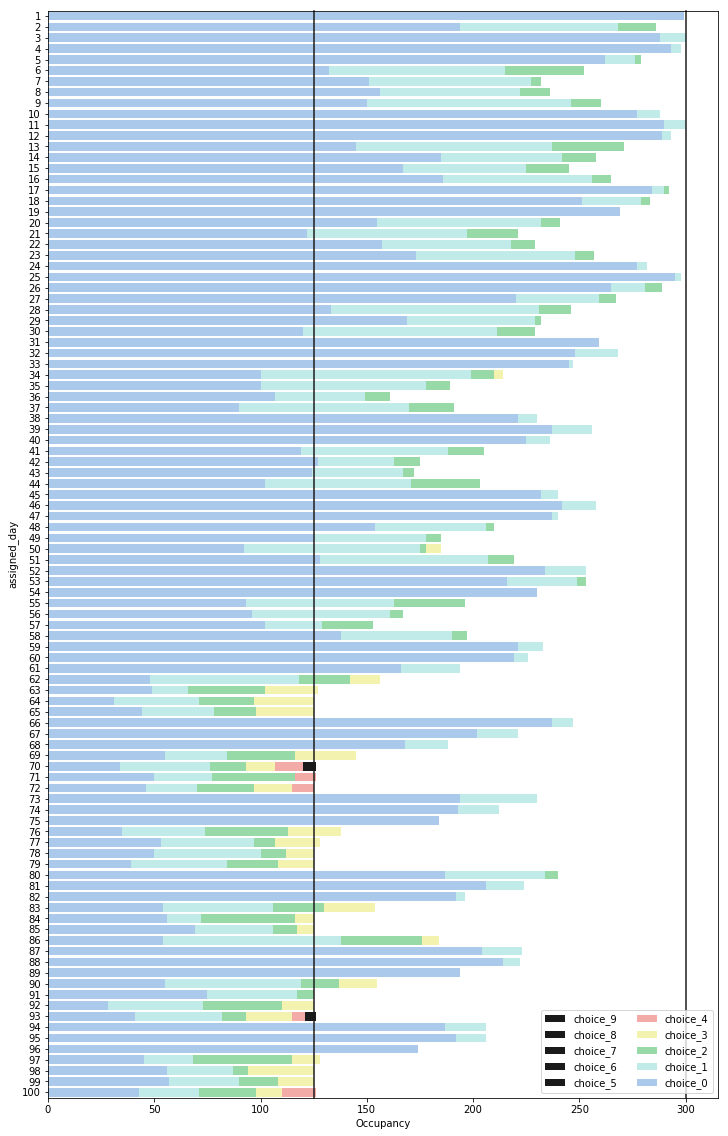

In [6]:
f, ax = plt.subplots(figsize=(12, 20))
sns.set_color_codes("pastel")
sns.barplot(x='n_people_9', y='assigned_day', data=agg_data, label='choice_9', orient='h', color='k')
sns.barplot(x='n_people_8', y='assigned_day', data=agg_data, label='choice_8', orient='h', color='k')
sns.barplot(x='n_people_7', y='assigned_day', data=agg_data, label='choice_7', orient='h', color='k')
sns.barplot(x='n_people_6', y='assigned_day', data=agg_data, label='choice_6', orient='h', color='k')
sns.barplot(x='n_people_5', y='assigned_day', data=agg_data, label='choice_5', orient='h', color='k')
sns.barplot(x='n_people_4', y='assigned_day', data=agg_data, label='choice_4', orient='h', color='r')
sns.barplot(x='n_people_3', y='assigned_day', data=agg_data, label='choice_3', orient='h', color='y')
sns.barplot(x='n_people_2', y='assigned_day', data=agg_data, label='choice_2', orient='h', color='g')
sns.barplot(x='n_people_1', y='assigned_day', data=agg_data, label='choice_1', orient='h', color='c')
sns.barplot(x='n_people_0', y='assigned_day', data=agg_data, label='choice_0', orient='h', color='b')
ax.axvline(125, color="k", clip_on=False)
ax.axvline(300, color="k", clip_on=False)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Occupancy")

You'll need to tweek it if you have any families that don't have a top 10 choice.

I hope this helps, be sure to upvote https://www.kaggle.com/c/santa-workshop-tour-2019/discussion/119654#latest-684807 as this is based off @hengck23 suggestion

In [7]:
sub.to_csv(f'submission.csv')